In [6]:
import sys  
sys.path

['/Users/panbo/Desktop/nl4dv_modify/examples/applications/notebook',
 '/Users/panbo/opt/anaconda3/lib/python38.zip',
 '/Users/panbo/opt/anaconda3/lib/python3.8',
 '/Users/panbo/opt/anaconda3/lib/python3.8/lib-dynload',
 '',
 '/Users/panbo/opt/anaconda3/lib/python3.8/site-packages',
 '/Users/panbo/opt/anaconda3/lib/python3.8/site-packages/aeosa',
 '/Users/panbo/opt/anaconda3/lib/python3.8/site-packages/IPython/extensions',
 '/Users/panbo/.ipython',
 '/applications/notebook/nl4dv']

In [12]:
%cd ./applications/notebook/nl4dv
# %cd /Users/panbo/Desktop/nl4dv_modify/examples

/Users/panbo/Desktop/nl4dv_modify/examples/applications/notebook/nl4dv


### Initialize NL4DV## Imports ### Set dependency parser

In [2]:
import os
import pdb
from nl4dv import NL4DV

nl4dv_instance = NL4DV(debug=False,verbose=False,alias_url="/Users/panbo/Library/Mobile Documents/com~apple~CloudDocs/Documents/VIS/nl4dv_modify/examples/assets/aliases/movies-w-year.json",data_url="/Users/panbo/Library/Mobile Documents/com~apple~CloudDocs/Documents/VIS/nl4dv_modify/examples/assets/data/movies-w-year.csv")
dependency_parser_config = {'name': 'corenlp','model': "/Users/panbo/Library/Mobile Documents/com~apple~CloudDocs/Documents/VIS/nl4dv_modify/examples/assets/jars/stanford-english-corenlp-2018-10-05-models.jar",'parser': "/Users/panbo/Library/Mobile Documents/com~apple~CloudDocs/Documents/VIS/nl4dv_modify/examples/assets/jars/stanford-parser.jar"}
nl4dv_instance.set_dependency_parser(config=dependency_parser_config)
# nl4dv_instance.analyze_query("Show the between budget and rating for Action and movies that grossed over 100M")
# nl4dv_instance.analyze_query("create a barchart showing average gross across genres")
nl4dv_instance.analyze_query("create a barchart showing average gross across genres")





ModuleNotFoundError: No module named 'examples'

In [ ]:
for Action and movies that grossed over 100M


In [1]:
import os
import pdb
from nl4dv import NL4DV

nl4dv_instance = NL4DV(debug=False,verbose=False,alias_url=os.path.join("..","..","assets","aliases","movies-w-year.json"),data_url=os.path.join("..","..","assets","data","movies-w-year.csv"))
dependency_parser_config = {'name': 'corenlp','model': os.path.join("..","..","assets","jars","stanford-english-corenlp-2018-10-05-models.jar"),'parser': os.path.join("..","..","assets","jars","stanford-parser.jar")}
nl4dv_instance.set_dependency_parser(config=dependency_parser_config)
nl4dv_instance.analyze_query("Show the between budget and rating for Action and movies that grossed over 100M")

{'query_raw': 'Show the between budget and rating for Action and movies that grossed over 100M',
 'query': 'show the between budget and rating for action and movies that grossed over 100000000',
 'dataset': '../../assets/data/movies-w-year.csv',
 'alias': '../../assets/aliases/movies-w-year.json',
 'visList': [{'attributes': ['Production Budget', 'IMDB Rating'],
   'queryPhrase': None,
   'visType': None,
   'tasks': ['filter', 'correlation'],
   'inferenceType': 'implicit',
   'vlSpec': {'$schema': 'https://vega.github.io/schema/vega-lite/v4.json',
    'mark': {'type': 'point', 'tooltip': True},
    'encoding': {'x': {'field': 'Production Budget',
      'type': 'quantitative',
      'axis': {'format': 's'}},
     'y': {'field': 'IMDB Rating',
      'type': 'quantitative',
      'axis': {'format': 's'}},
     'tooltip': {'field': 'Title'}},
    'transform': [{'filter': 'lower(datum["Worldwide Gross"]) > 100000000.0'},
     {'filter': {'field': 'Genre', 'oneOf': ['Action']}}],
    'data

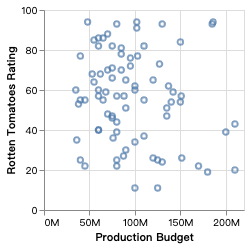

In [3]:
from vega import VegaLite
vsp={'$schema': 'https://vega.github.io/schema/vega-lite/v4.json',
    'mark': {'type': 'point', 'tooltip': True},
    'encoding': {'x': {'field': 'Production Budget',
      'type': 'quantitative',
      'axis': {'format': 's'}},
     'y': {'field': 'Rotten Tomatoes Rating',
      'type': 'quantitative',
      'axis': {'format': 's'}},
     'tooltip': {'field': 'Title'}},
    'transform': [{'filter': 'lower(datum["Worldwide Gross"]) > 100000000.0'},
     {'filter': {'field': 'Genre', 'oneOf': ['Action']}}],
    'data': {'url': '../../assets/data/movies-w-year.csv',
     'format': {'type': 'csv'}}}
VegaLite(vsp)

In [10]:
from fuzzywuzzy import fuzz
from difflib import SequenceMatcher
s1="NEW YORK METS"
s2="NEW YORK MEATS"
# fuzz.ratio("NEW YORK METS", "NEW YORK MEATS")
m = SequenceMatcher(None, s1, s2)
m.ratio()
m.get_matching_blocks( )

[Match(a=0, b=0, size=11),
 Match(a=11, b=12, size=2),
 Match(a=13, b=14, size=0)]

In [36]:
s1="mariners vs angels"
s2="los angeles angels of anaheim at seattle mariners"
tokens1=set(s1.split())
tokens2=set(s2.split())

intersection = tokens1.intersection(tokens2)
diff1to2 = tokens1.difference(tokens2)
diff2to1 = tokens2.difference(tokens1)
sorted_sect = " ".join(sorted(intersection))
sorted_1to2 = " ".join(sorted(diff1to2))
sorted_2to1 = " ".join(sorted(diff2to1))
combined_1to2 = sorted_sect + " " + sorted_1to2
combined_2to1 = sorted_sect + " " + sorted_2to1
# strip
sorted_sect = sorted_sect.strip()
combined_1to2 = combined_1to2.strip()
combined_2to1 = combined_2to1.strip()

In [39]:
print(sorted_sect)
print(combined_1to2)
print(combined_2to1)

angels mariners
angels mariners vs
angels mariners anaheim angeles at los of seattle


In [46]:
print(fuzz.ratio(sorted_sect,combined_1to2))
print(fuzz.ratio(sorted_sect,combined_2to1))
print(fuzz.ratio(combined_1to2,combined_2to1))

91
47
51


In [30]:
fuzz.token_set_ratio("mariners vs angels", "los angeles angels of anaheim at seattle mariners")

91

In [2]:
nl4dv_instance.analyze_query("Show average gross across genres")

{'query_raw': 'Show average gross across genres',
 'query': 'show average gross across genres',
 'dataset': '../../assets/data/movies-w-year.csv',
 'alias': None,
 'visList': [{'attributes': ['Worldwide Gross', 'Genre'],
   'queryPhrase': None,
   'visType': None,
   'tasks': ['derived_value'],
   'inferenceType': 'implicit',
   'vlSpec': {'$schema': 'https://vega.github.io/schema/vega-lite/v4.json',
    'mark': {'type': 'bar', 'tooltip': True},
    'encoding': {'y': {'field': 'Worldwide Gross',
      'type': 'quantitative',
      'aggregate': 'mean',
      'axis': {'format': 's'}},
     'x': {'field': 'Genre', 'type': 'nominal'}},
    'transform': [],
    'data': {'url': '../../assets/data/movies-w-year.csv',
     'format': {'type': 'csv'}}}}],
 'attributeMap': {'Genre': {'name': 'Genre',
   'queryPhrase': ['genres'],
   'inferenceType': 'explicit',
   'isAmbiguous': False,
   'ambiguity': []},
  'Worldwide Gross': {'name': 'Worldwide Gross',
   'queryPhrase': ['gross'],
   'inference

In [3]:
nl4dv_instance.analyze_query("for science fiction and fantasy movies")

KeyError: 'Genre'

In [10]:
l=[[(('show', 'VB'), 'dobj', ('average', 'NN')), (('average', 'NN'), 'amod', ('gross', 'JJ')), (('show', 'VB'), 'nmod', ('genres', 'NNS')), (('genres', 'NNS'), 'case', ('across', 'IN')), (('genres', 'NNS'), 'nmod', ('movies', 'NNS')), (('movies', 'NNS'), 'case', ('for', 'IN')), (('movies', 'NNS'), 'compound', ('sciencefiction', 'NN')), (('sciencefiction', 'NN'), 'cc', ('and', 'CC')), (('sciencefiction', 'NN'), 'conj', ('fantasy', 'NN'))]]

l[0][0]

(('show', 'VB'), 'dobj', ('average', 'NN'))

### Render vis

normal query
[]


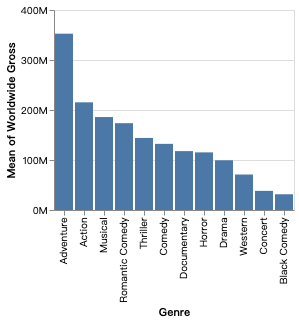

In [2]:
import os
import pdb
from nl4dv import NL4DV

nl4dv_instance = NL4DV(debug=False,verbose=False,data_url=os.path.join("..","..","assets","data","movies-w-year.csv"))
dependency_parser_config = {'name': 'corenlp','model': os.path.join("..","..","assets","jars","stanford-english-corenlp-2018-10-05-models.jar"),'parser': os.path.join("..","..","assets","jars","stanford-parser.jar")}
nl4dv_instance.set_dependency_parser(config=dependency_parser_config)
# nl4dv_instance.analyze_query("Create a histogram showing distribution of IMDB ratings")
nl4dv_instance.render_vis("create a barchart showing max gross across genres")


 

In [4]:
nl4dv_instance.analyze_query("create a barchart showing max gross across genres")


{'query_raw': 'create a barchart showing max gross across genres',
 'query': 'create a barchart showing max gross across genres',
 'dataset': '../../assets/data/movies-w-year.csv',
 'alias': None,
 'visList': [{'attributes': ['Worldwide Gross', 'Genre'],
   'queryPhrase': 'barchart',
   'visType': 'barchart',
   'tasks': ['find_extremum'],
   'inferenceType': 'explicit',
   'vlSpec': {'$schema': 'https://vega.github.io/schema/vega-lite/v4.json',
    'mark': {'type': 'bar', 'tooltip': True},
    'encoding': {'y': {'field': 'Worldwide Gross',
      'type': 'quantitative',
      'aggregate': 'mean',
      'axis': {'format': 's'}},
     'x': {'field': 'Genre', 'type': 'nominal', 'sort': '-y'}},
    'transform': [],
    'data': {'url': '../../assets/data/movies-w-year.csv',
     'format': {'type': 'csv'}}}}],
 'attributeMap': {'Genre': {'name': 'Genre',
   'queryPhrase': ['genres'],
   'inferenceType': 'explicit',
   'isAmbiguous': False,
   'ambiguity': []},
  'Worldwide Gross': {'name': '

In [3]:
print(nl4dv_instance.analyze_query("for science fiction and fantasy movies"))


KeyError: 'Genre'

### Execute Query

In [8]:
nl4dv_instance.analyze_query("@")

{'query_raw': '@',
 'query': '@',
 'dataset': '../../assets/data/movies-w-year.csv',
 'alias': '../../assets/aliases/movies-w-year.json',
 'visList': [],
 'attributeMap': {},
 'taskMap': {},
 'followUpQuery': False,
 'contextObj': None}

In [ ]:
MAGIC CMD: CLEAR
{'query_raw': 'MAGIC CMD: CLEAR',
 'query': 'MAGIC CMD: CLEAR',
 'dataset': '../../assets/data/movies-w-year.csv',
 'alias': '../../assets/aliases/movies-w-year.json',
 'visList': [],
 'attributeMap': {},
 'taskMap': {},
 'followUpQuery': False,
 'contextObj': None}

## Dialog test1

In [1]:
import os
import pdb
from nl4dv import NL4DV

nl4dv_instance = NL4DV(debug=False,verbose=False,alias_url=os.path.join("..","..","assets","aliases","movies-w-year.json"),data_url=os.path.join("..","..","assets","data","movies-w-year.csv"))
dependency_parser_config = {'name': 'corenlp','model': os.path.join("..","..","assets","jars","stanford-english-corenlp-2018-10-05-models.jar"),'parser': os.path.join("..","..","assets","jars","stanford-parser.jar")}
nl4dv_instance.set_dependency_parser(config=dependency_parser_config)

normal query
-----Data Transform---------
[{'filter': {'field': 'Creative Type', 'oneOf': ['Science Fiction']}}]


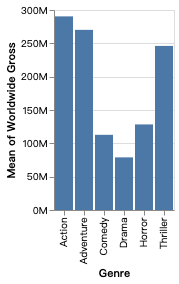

In [2]:
nl4dv_instance.render_vis("Show average gross across genres for science fiction")

a follow up query!
-----Data Transform---------
[{'filter': {'field': 'Creative Type', 'oneOf': ['Science Fiction']}}, {'filter': {'field': 'Creative Type', 'oneOf': ['Fantasy']}}]


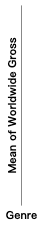

In [3]:
nl4dv_instance.render_vis("fantasy movies")

a follow up query!
-----Data Transform---------
[{'filter': {'field': 'Creative Type', 'oneOf': ['Science Fiction']}}]


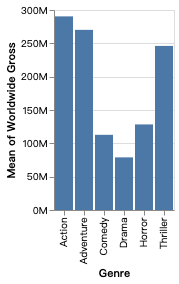

In [4]:
nl4dv_instance.render_vis("science fiction")

a follow up query!
-----Data Transform---------
[{'filter': {'field': 'Creative Type', 'oneOf': ['Science Fiction']}}, {'filter': {'field': 'Creative Type', 'oneOf': ['Fantasy']}}, {'filter': 'lower(datum["Worldwide Gross"]) > 100000000.0'}]


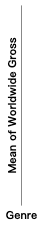

In [4]:
nl4dv_instance.render_vis("gross over 100M")
# nl4dv_instance.render_vis("glloss over 100M")

## Dialog test2 

normal query
-----Data Transform---------
[{'filter': {'field': 'Creative Type', 'oneOf': ['Science Fiction']}}]


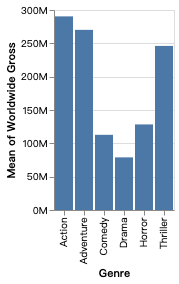

In [1]:
import os
import pdb
from nl4dv import NL4DV

nl4dv_instance = NL4DV(debug=False,verbose=False,alias_url=os.path.join("..","..","assets","aliases","movies-w-year.json"),data_url=os.path.join("..","..","assets","data","movies-w-year.csv"))
dependency_parser_config = {'name': 'corenlp','model': os.path.join("..","..","assets","jars","stanford-english-corenlp-2018-10-05-models.jar"),'parser': os.path.join("..","..","assets","jars","stanford-parser.jar")}
nl4dv_instance.set_dependency_parser(config=dependency_parser_config)
# nl4dv_instance.analyze_query("Show the relationship between budget and rating for Action and movies that grossed over 100M")
# nl4dv_instance.render_vis("Show average gross across genres for science fiction")
# nl4dv_instance.render_vis("fantasy movies")
# nl4dv_instance.render_vis("science fiction")
# nl4dv_instance.render_vis("create a barchart showing average gross across genres")
nl4dv_instance.render_vis("Show average gross across genres for science fiction")
# nl4dv_instance.render_vis("Show average gross across genres for science fiction")


a follow up query!
-----Data Transform---------
[{'filter': {'field': 'Creative Type', 'oneOf': ['Science Fiction']}}, {'filter': 'lower(datum["Worldwide Gross"]) > 100000000.0'}]


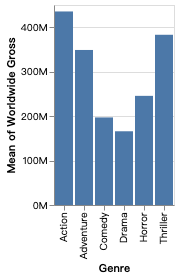

In [2]:
# nl4dv_instance.render_vis("gross over 200M")
nl4dv_instance.render_vis("gross over 100M")

In [ ]:
## Dialog test END

In [ ]:
nl4dv_instance.render_vis("Create a histogram showing distribution of IMDB ratings")

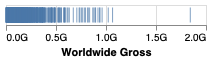

In [5]:
nl4dv_instance.render_vis("gross as a stripplot")

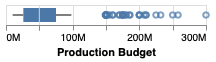

In [6]:
nl4dv_instance.render_vis("budget as a boxplot")

In [11]:
nl4dv_instance.analyze_query("for science fiction and fantasy movies")

[[(('movies', 'NNS'), 'case', ('for', 'IN')),
  (('movies', 'NNS'), 'compound', ('sciencefiction', 'NN')),
  (('sciencefiction', 'NN'), 'cc', ('and', 'CC')),
  (('sciencefiction', 'NN'), 'conj', ('fantasy', 'NN'))]]


{'query_raw': 'for science fiction and fantasy movies',
 'query': 'for science fiction and fantasy movies',
 'dataset': '../../assets/data/movies-w-year.csv',
 'alias': '../../assets/aliases/movies-w-year.json',
 'visList': [{'attributes': ['Title'],
   'queryPhrase': None,
   'visType': None,
   'tasks': ['filter'],
   'inferenceType': 'implicit',
   'vlSpec': {'$schema': 'https://vega.github.io/schema/vega-lite/v4.json',
    'mark': {'type': 'bar', 'tooltip': True},
    'encoding': {'x': {'field': 'Title', 'type': 'nominal'},
     'y': {'field': 'Title', 'type': 'nominal', 'aggregate': 'count'}},
    'transform': [{'filter': {'field': 'Creative Type',
       'oneOf': ['Science Fiction', 'Fantasy']}}],
    'data': {'url': '../../assets/data/movies-w-year.csv',
     'format': {'type': 'csv'}}}}],
 'attributeMap': {'Creative Type': {'name': 'Creative Type',
   'queryPhrase': ['science fiction', 'fantasy'],
   'inferenceType': 'implicit',
   'isAmbiguous': False,
   'ambiguity': []},
  '

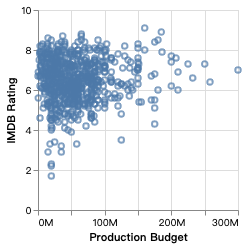

In [2]:
nl4dv_instance.render_vis("Visualize rating and budget")

[[(('show', 'VB'), 'dobj', ('relationship', 'NN')),
  (('relationship', 'NN'), 'det', ('the', 'DT')),
  (('relationship', 'NN'), 'nmod', ('budget', 'NN')),
  (('budget', 'NN'), 'case', ('between', 'IN')),
  (('budget', 'NN'), 'cc', ('and', 'CC')),
  (('budget', 'NN'), 'conj', ('rating', 'NN')),
  (('budget', 'NN'), 'nmod', ('movies', 'NNS')),
  (('movies', 'NNS'), 'case', ('for', 'IN')),
  (('movies', 'NNS'), 'compound', ('action', 'NN')),
  (('action', 'NN'), 'cc', ('and', 'CC')),
  (('action', 'NN'), 'conj', ('adventure', 'NN')),
  (('relationship', 'NN'), 'acl:relcl', ('grossed', 'VBN')),
  (('grossed', 'VBN'), 'nsubj', ('that', 'WDT')),
  (('grossed', 'VBN'), 'nmod', ('100000000', 'CD')),
  (('100000000', 'CD'), 'case', ('over', 'IN'))]]


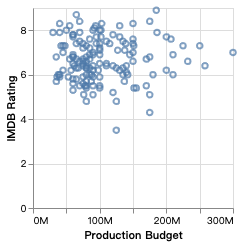

In [7]:
nl4dv_instance.render_vis("show the relationship between budget and rating for action and adventure movies that grossed over 100M")